In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.HDFStore('data/data.h5','r')
parammat=data['parammat']
targ=data['targ']
data.close()

In [6]:
from sklearn.model_selection import train_test_split
XTraining, XValidation, YTraining, YValidation = train_test_split(parammat,targ,test_size=0.1, shuffle=False) # before model building

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
print(tf.config.list_physical_devices())

2024-05-13 16:12:39.208104: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [15]:
fflds=targ.columns.get_level_values(0)
fdates=targ.columns.get_level_values(1)
flds=targ.columns.get_level_values(0).unique()
dates=targ.columns.get_level_values(1).unique()
nflds=targ.shape[1]
nflds

20

In [9]:
dnn_model=keras.models.load_model('data/dnn_cicero.keras')

/Users/sanderson/Documents/GitHub/ciceroscm/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
X_train = tf.convert_to_tensor(XTraining, dtype=tf.float32)
Y_train = tf.convert_to_tensor(YTraining, dtype=tf.float32)
X_dev = tf.convert_to_tensor(XValidation, dtype=tf.float32)
Y_dev = tf.convert_to_tensor(YValidation, dtype=tf.float32)

In [11]:
pred = dnn_model.predict(X_dev)
pred_t = dnn_model.predict(X_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [22]:
store = pd.HDFStore('data/obs.h5','r')
obs=store['obs']
obsunc=store['obsunc']
store.close()

/var/folders/84/4wyjr_hn4z3_63hhr5k4mf6m0000gn/T/ipykernel_3031/2028304944.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].axhline(obs[i])


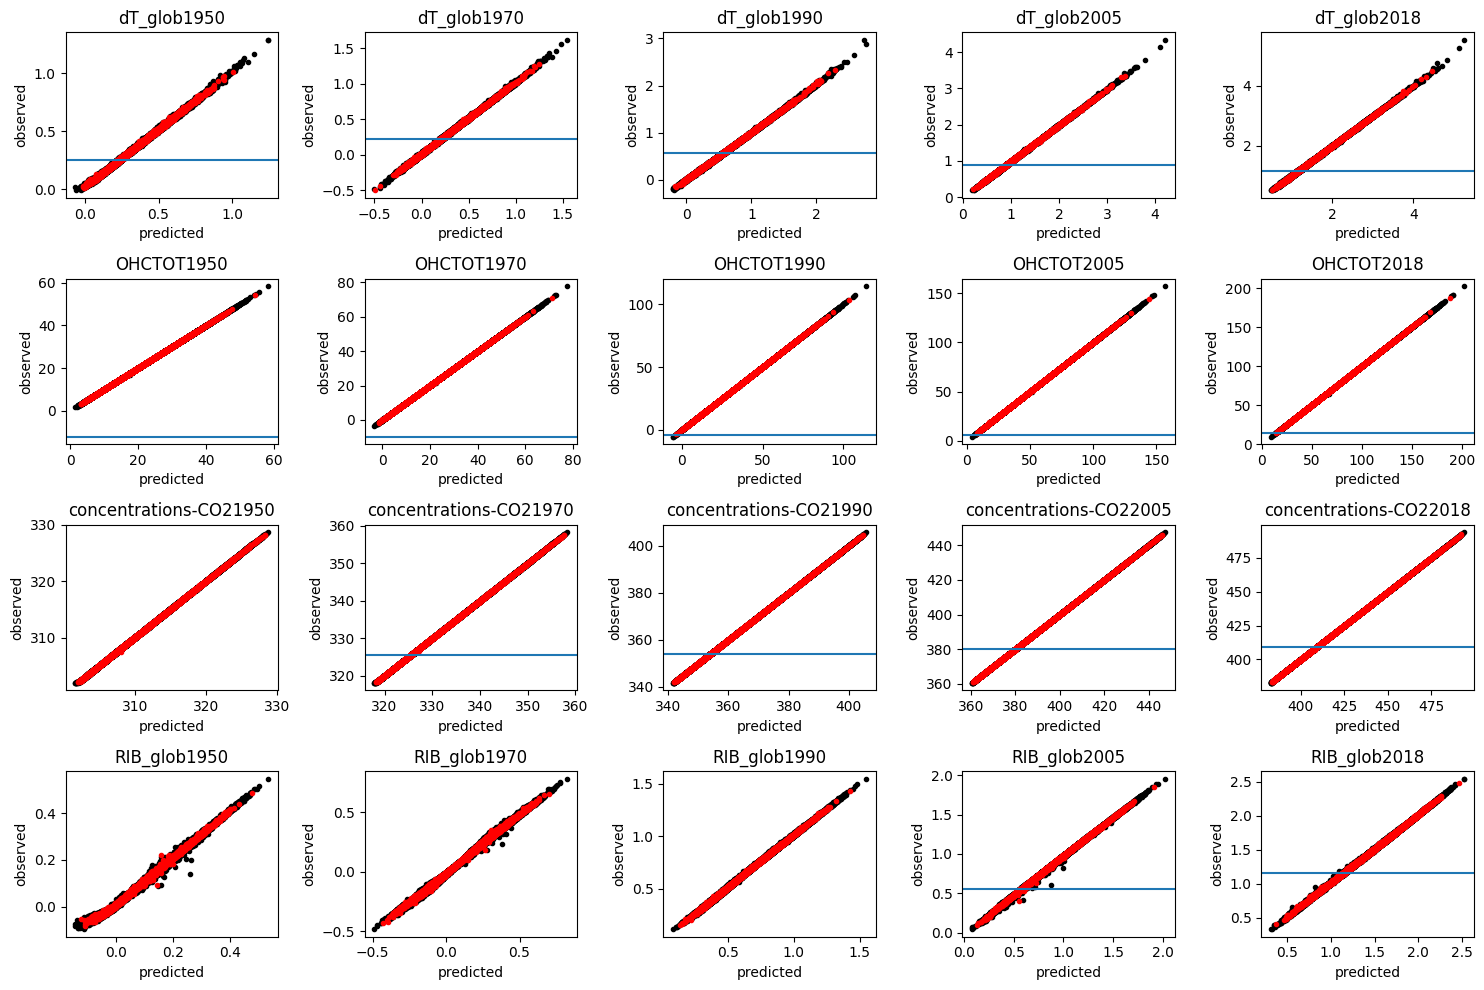

In [23]:
fig, ax = plt.subplots( len(flds), len(dates),figsize=(15, 10))

ax=ax.flatten()
for i in np.arange(nflds):
  ax[i].plot(pred_t[:,i],Y_train[:,i],'k.')
  ax[i].plot(pred[:,i],Y_dev[:,i],'r.')
  ax[i].set_title(fflds[i]+str(fdates[i]))
  ax[i].set_xlabel('predicted')
  ax[i].set_ylabel('observed')
  ax[i].axhline(obs[i])
plt.tight_layout()

In [31]:
targ['OHCTOT'].T-targ['OHCTOT'][1990]

run_id,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
year,,,,,,,,,,,,,,,,,,,,,
1950,-26.522382,-30.789395,-10.722708,-23.327809,-3.995941,-9.676658,-12.140526,-22.545784,-13.367470,-36.691221,...,5.151122,-17.520309,-32.945871,-2.589559,-5.820481,-25.245530,-23.724758,-2.496614,-14.375541,-19.534843
1970,-19.245631,-21.255910,-9.822708,-16.468471,-5.579531,-8.733845,-9.483680,-16.489894,-11.257995,-25.105221,...,-0.744204,-13.394848,-22.930038,-4.855358,-6.577730,-18.198697,-17.235259,-4.923615,-11.637679,-14.472397
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005,27.961423,27.017321,22.597372,20.428629,17.418742,16.495674,12.868018,23.353916,20.846474,32.282771,...,13.977071,18.621939,29.573053,16.563113,14.468837,27.062870,25.668995,16.739143,19.737048,21.576505
2018,58.534002,55.696928,49.750783,41.723362,38.644507,35.159243,26.260971,48.656316,44.679773,67.134482,...,31.385568,38.493057,61.247041,36.795655,30.842917,57.325636,54.048486,36.979194,41.678956,45.405221
